In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyslaw.pyslaw import LinearModel

# Analytical solution of the flow over the Witch of Agnesi hill

TODO:
- Add short description here (include author?)
- Cleanup visualization (e.g. midpointnorm)
- Cleanup sandbox

Flow parameters

In [3]:
U = 10   # Wind speed [m/s]
N = 0.01 # Brunt-Vaisala frequency [1/s]

Hill shape

In [4]:
L = 1000.0   # Characteristic width of the hill [m]
hmax = 100.0 # Height of the hill [m]

# Shape function of the hill
h = lambda x: hmax/(1+(x/L)**2)

Numerical parameters

In [5]:
Lx = 2000.0e3  # Length of the numerical domain [m]
Nx = int(1e5) # Number of grid points

## Solve flow problem

Create numerical grid

In [24]:
xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
Nz = 151
zs = np.linspace(0,15000,Nz)
print('Grid resolution is {} m'.format(dx))

Grid resolution is 20.0 m


In [25]:
model = LinearModel(xs,h(xs),U,N)

In [26]:
%%time
eta = model.calculate_eta(zs)

CPU times: user 865 ms, sys: 262 ms, total: 1.13 s
Wall time: 1.14 s


In [29]:
%%time
w = model.calculate_w(zs)

CPU times: user 853 ms, sys: 299 ms, total: 1.15 s
Wall time: 1.21 s


## Visualization

In [27]:
#Self defined norm function
from matplotlib.colors import Normalize

class midpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

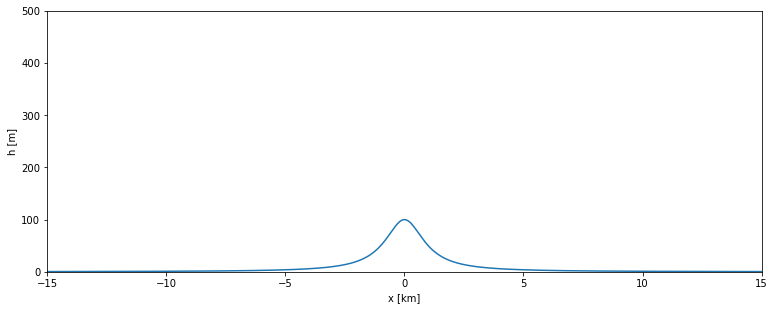

In [36]:
f,ax = plt.subplots(1,1,figsize=(12.8,4.8))
ax.plot(xs/1.e3,h(xs))
_ = ax.set(xlim=[-15,15],ylim=[0,500],xlabel='x [km]',ylabel='h [m]')

Text(0, 0.5, 'z [km]')

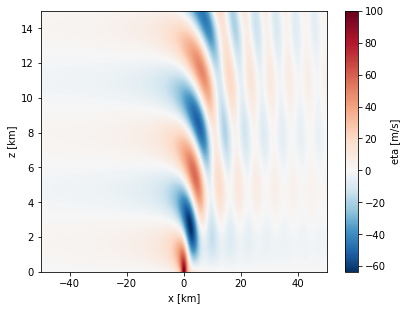

In [32]:
f,ax=plt.subplots(1,1,figsize=(6.4,4.8))

vmin = np.min(eta)
vmax = np.max(eta)

extent = [xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3]
im=ax.imshow(np.fliplr(eta).T,extent=extent,aspect='auto',cmap='RdBu_r',norm=midpointNormalize(midpoint=0))
cbar = f.colorbar(im,ax=ax,shrink=1.0)
ax.set_xlim([-50,50])
cbar.set_label('eta [m]')
ax.set_xlabel('x [km]')
ax.set_ylabel('z [km]')

Text(0, 0.5, 'z [km]')

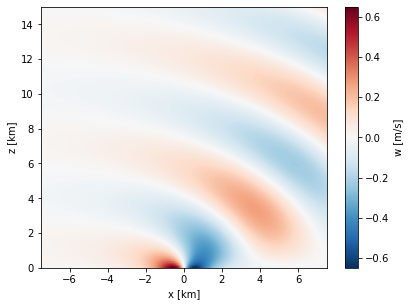

In [31]:
f,ax=plt.subplots(1,1,figsize=(6.4,4.8))

extent = [xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3]
im=ax.imshow(np.fliplr(w).T,extent=extent,aspect='auto',cmap='RdBu_r',norm=midpointNormalize(midpoint=0))
cbar = f.colorbar(im,ax=ax,shrink=1.0)
ax.set_xlim([-7.5,7.5])
cbar.set_label('w [m/s]')
ax.set_xlabel('x [km]')
ax.set_ylabel('z [km]')